<img src='img/logo.png'>
<img src='img/title.png'>
<img src='img/py3k.png'>

# Table of Contents
* [Learning Objectives](#Learning-Objectives)
* [Working with polygons](#Working-with-polygons)
	* [Example: Census tracts](#Example:-Census-tracts)
	* [Visualize the data](#Visualize-the-data)
* [Problem: Create function for polygon area](#Problem:-Create-function-for-polygon-area)


# Learning Objectives

* Develop library functions
* Find area of polygons
* Leverage previously developed code
* Work with APIs of external libraries

**The series of exercises in the Geospatial series are intended to present a realistically difficult set of development problems.  These exercises might take a half day or more for a class to work on extensively.**

# Working with polygons

A common way of defining geographic regions is by using polygons to define their bounding edges.  Obviously, this description cannot describe smooth curves at borders, but for most practical purposes, regions are usually defined using this simplification.  Given a region, there are various tasks we might do with it, which will be developed in the next few exercises.

## Example: Census tracts

To illustrate working with shapes, we will use census tracts defined in the [Shapefile](https://en.wikipedia.org/wiki/Shapefile) format.  We will also use the existing library `shapefile.py` to read in the data.  Read the documentation on the [`shapefile`](https://github.com/GeospatialPython/pyshp) module.  

We'll play with the datastructures provided by the module in a few cells.  Explore the full API yourself.

In [1]:
import src.shapefile as shapefile

In [2]:
# An alternative is
# import sys
# sys.path.append('src')
# import shapefile

In [3]:
# Read in some census tracts for the New Orleans area
r = shapefile.Reader("data/GIS_CensusTract/GIS_CensusTract_poly")

In [4]:
r.fields

[('DeletionFlag', 'C', 1, 0),
 ['GEODB_OID', 'N', 11, 0],
 ['OBJECTID', 'N', 11, 0],
 ['PERMANE0', 'C', 40, 0],
 ['SOURCE_1', 'C', 40, 0],
 ['SOURCE_2', 'C', 40, 0],
 ['SOURCE_3', 'C', 100, 0],
 ['SOURCE_4', 'C', 130, 0],
 ['DATA_SE5', 'C', 46, 0],
 ['DISTRIB6', 'C', 188, 0],
 ['LOADDATE', 'D', 8, 0],
 ['QUALITY', 'C', 35, 0],
 ['SCALE', 'C', 52, 0],
 ['FCODE', 'C', 38, 0],
 ['STCO_FI7', 'C', 5, 0],
 ['STATE_NAME', 'C', 140, 0],
 ['COUNTY_8', 'C', 60, 0],
 ['CENSUST9', 'C', 20, 0],
 ['POPULAT10', 'N', 11, 0],
 ['AREASQKM', 'N', 31, 15],
 ['GNIS_ID', 'C', 10, 0],
 ['POPULAT11', 'N', 11, 0],
 ['DB2GSE_12', 'N', 31, 15],
 ['DB2GSE_13', 'N', 31, 15]]

In [5]:
# Map the field name to their position
## A little trial and error shows that'DeletionFlag' in r.fields 
## is missing in the corresponding r.records() list
fields = {}
for n, (name, _, _, _) in enumerate(r.fields):
    fields[name] = n-1 if n>0 else None
fields

{'AREASQKM': 18,
 'CENSUST9': 16,
 'COUNTY_8': 15,
 'DATA_SE5': 7,
 'DB2GSE_12': 21,
 'DB2GSE_13': 22,
 'DISTRIB6': 8,
 'DeletionFlag': None,
 'FCODE': 12,
 'GEODB_OID': 0,
 'GNIS_ID': 19,
 'LOADDATE': 9,
 'OBJECTID': 1,
 'PERMANE0': 2,
 'POPULAT10': 17,
 'POPULAT11': 20,
 'QUALITY': 10,
 'SCALE': 11,
 'SOURCE_1': 3,
 'SOURCE_2': 4,
 'SOURCE_3': 5,
 'SOURCE_4': 6,
 'STATE_NAME': 14,
 'STCO_FI7': 13}

In [6]:
# Find the population of one census tract
tract = r.records()[17]
population = tract[fields['POPULAT10']]
tract_id = tract[fields['CENSUST9']]
print("Tract %s has population %d" % (tract_id, population))

Tract 22103041102 has population 7145


## Visualize the data

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

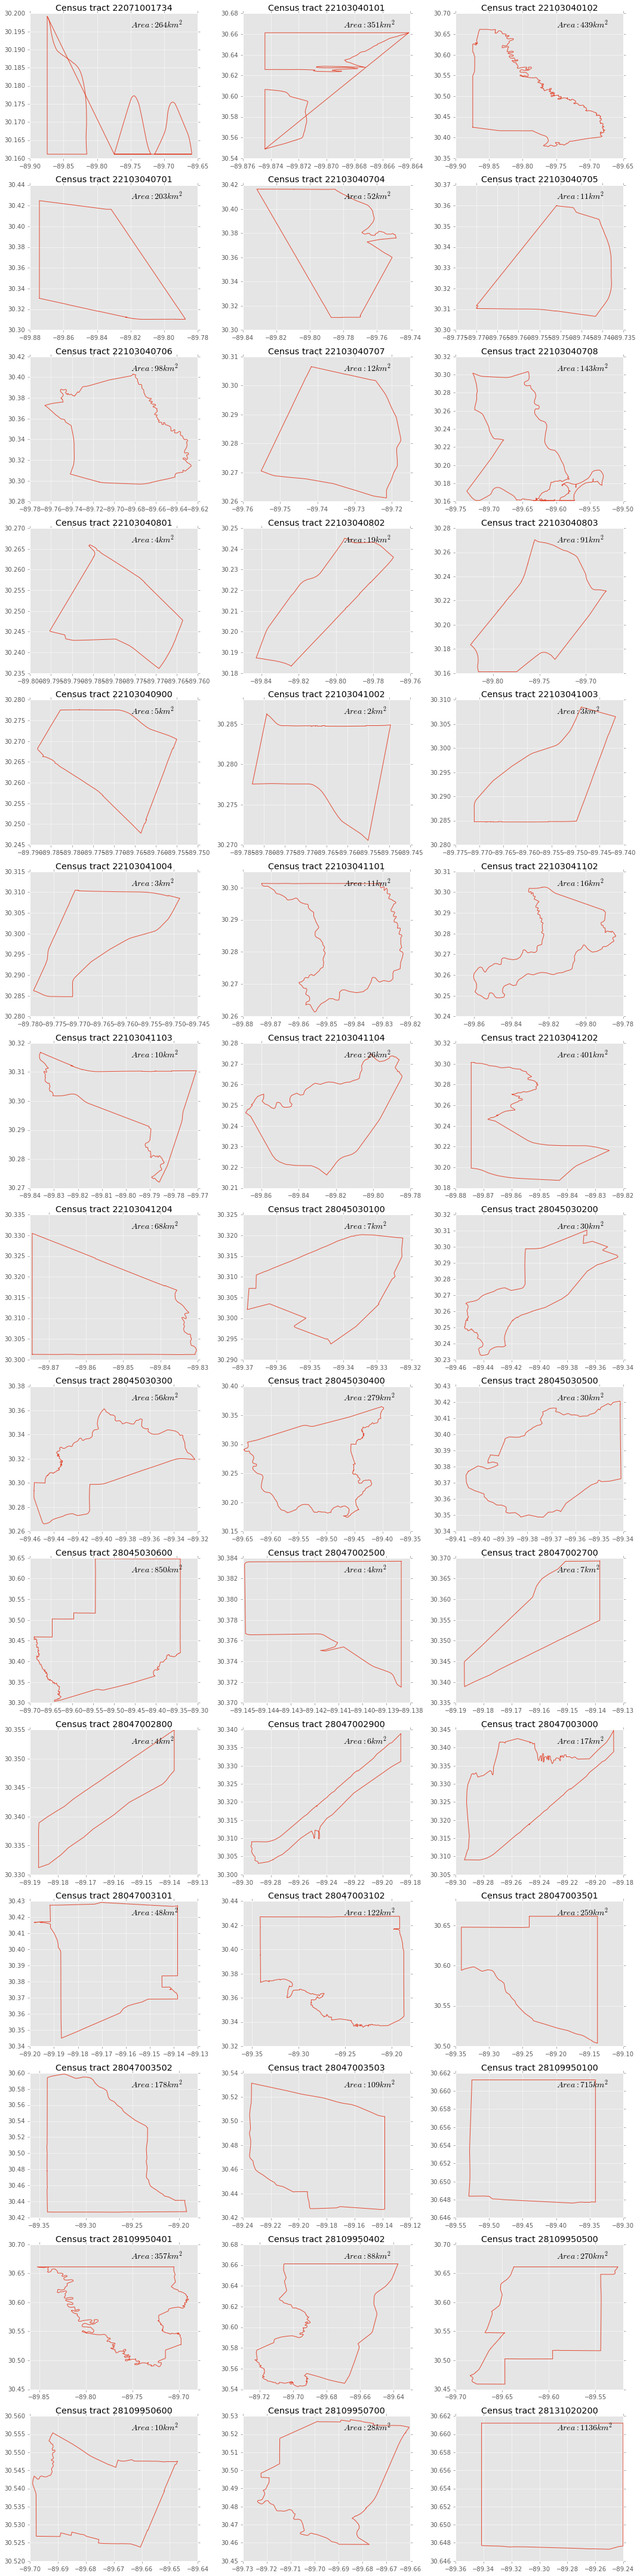

In [8]:
with plt.style.context('ggplot'):
    shapes = r.shapes()
    records = r.records()
    rows, cols = 15, 3
    fig, ax = plt.subplots(rows, cols, figsize=(15,60), dpi=100)
    for colnum, col in enumerate(ax):
        for rownum, axis in enumerate(col):
            index = rownum + cols*colnum
            if index >= len(shapes):
                break
            x, y = zip(*shapes[index].points)
            axis.plot(x, y)
            tract_id = records[index][fields['CENSUST9']]
            axis.ticklabel_format(useOffset=False)
            population = records[index][fields['AREASQKM']]
            axis.text(0.6, 0.9, "$Area: %d km^2$" % population,  
                      transform=axis.transAxes, fontsize=14)
            axis.set_title("Census tract %s" % tract_id)
    fig.tight_layout();

# Problem: Create function for polygon area

This problem has a long preface leading up to the library function you will need to create.  We can combine the techniques in the `point_in_poly()` that we implemented in the last exercise with the Monte Carlo simulation technique we looked at in the exercise on Monte Carlo simulation of $\pi$ to find the area of an arbitrary polygon.

For this exercise, you can use the known values published by the US Census Bureau to create unit test for your own code. The Census Bureau defines regions in latitude/longitude, but gives area in square kilometers. Use the best coding practices we have studied in developing your implentation.  Be sure to add additional test cases that are not in the sample set provided.

When you design a library function, perhaps called `polygon_area()`, think about the API you would like it to have and would be most versative for later use.

A closed form solution for the area of a non-self-intersecting polygon exists.  See http://mathworld.wolfram.com/PolygonArea.html for details.  However, notice also that Census tracts do not conform to this non-self-intersecting constraint.  Is it possible to detect self-interection?

<img src='img/copyright.png'>